# Miami housing prices : A Machine Learning Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

#### 1. Data Preprocessing and Exploration:

In [2]:
# load the data
miami_housing_data = pd.read_csv("D:/Hochschule Fresenius notes (sem3)/Artifical Intelligence and Machine Learning/Miami_housing/miami_housing_prices.csv", delimiter=",")
miami_housing_data.head()  #print the first five rows

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,6.220000e+11,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,6.220000e+11,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,6.220000e+11,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,6.220000e+11,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,6.220000e+11,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


### Correlation matrix plot

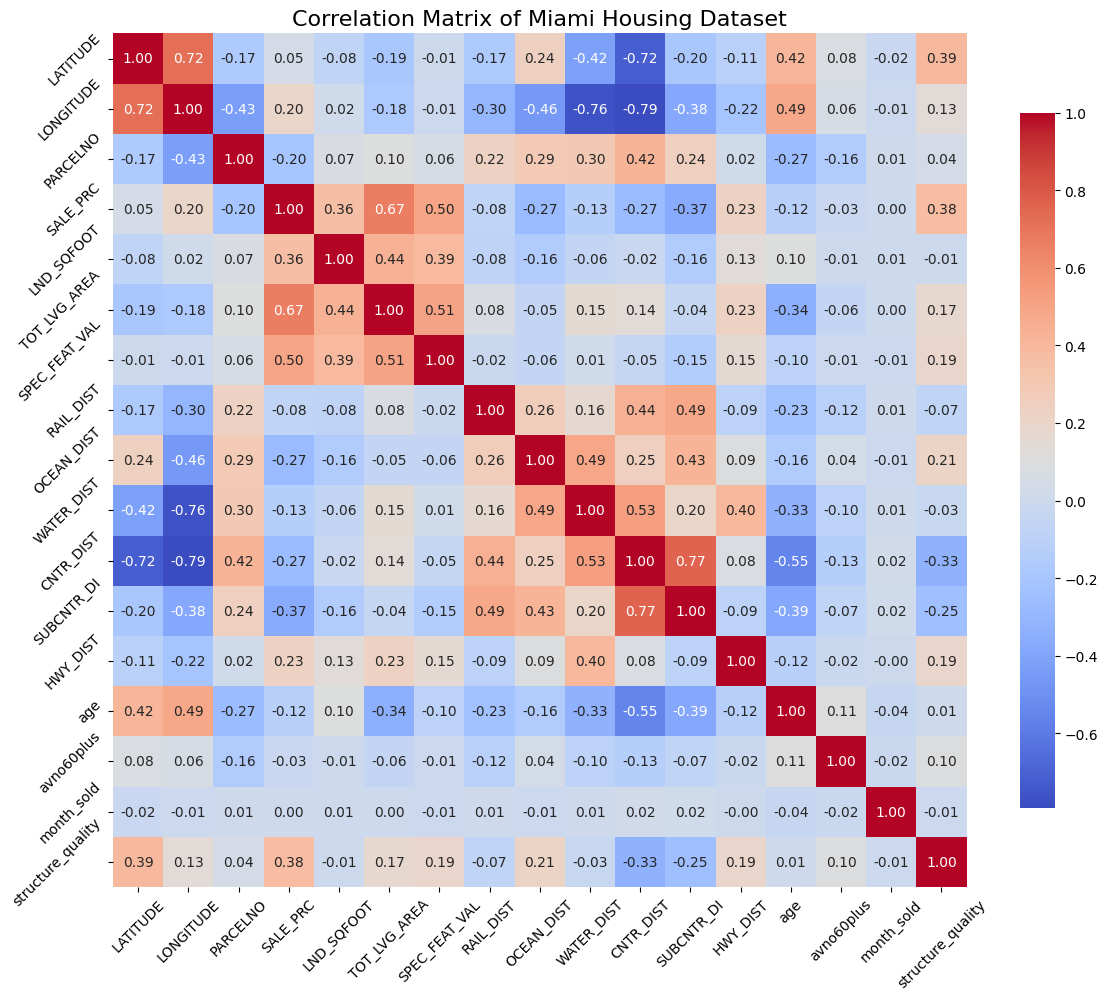

In [3]:
correlation_matrix = miami_housing_data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix of Miami Housing Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

In [4]:
missing_values = miami_housing_data.isnull().sum() 
print("Missing values in each column:\n", missing_values) #checking for any missing values

Missing values in each column:
 LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64


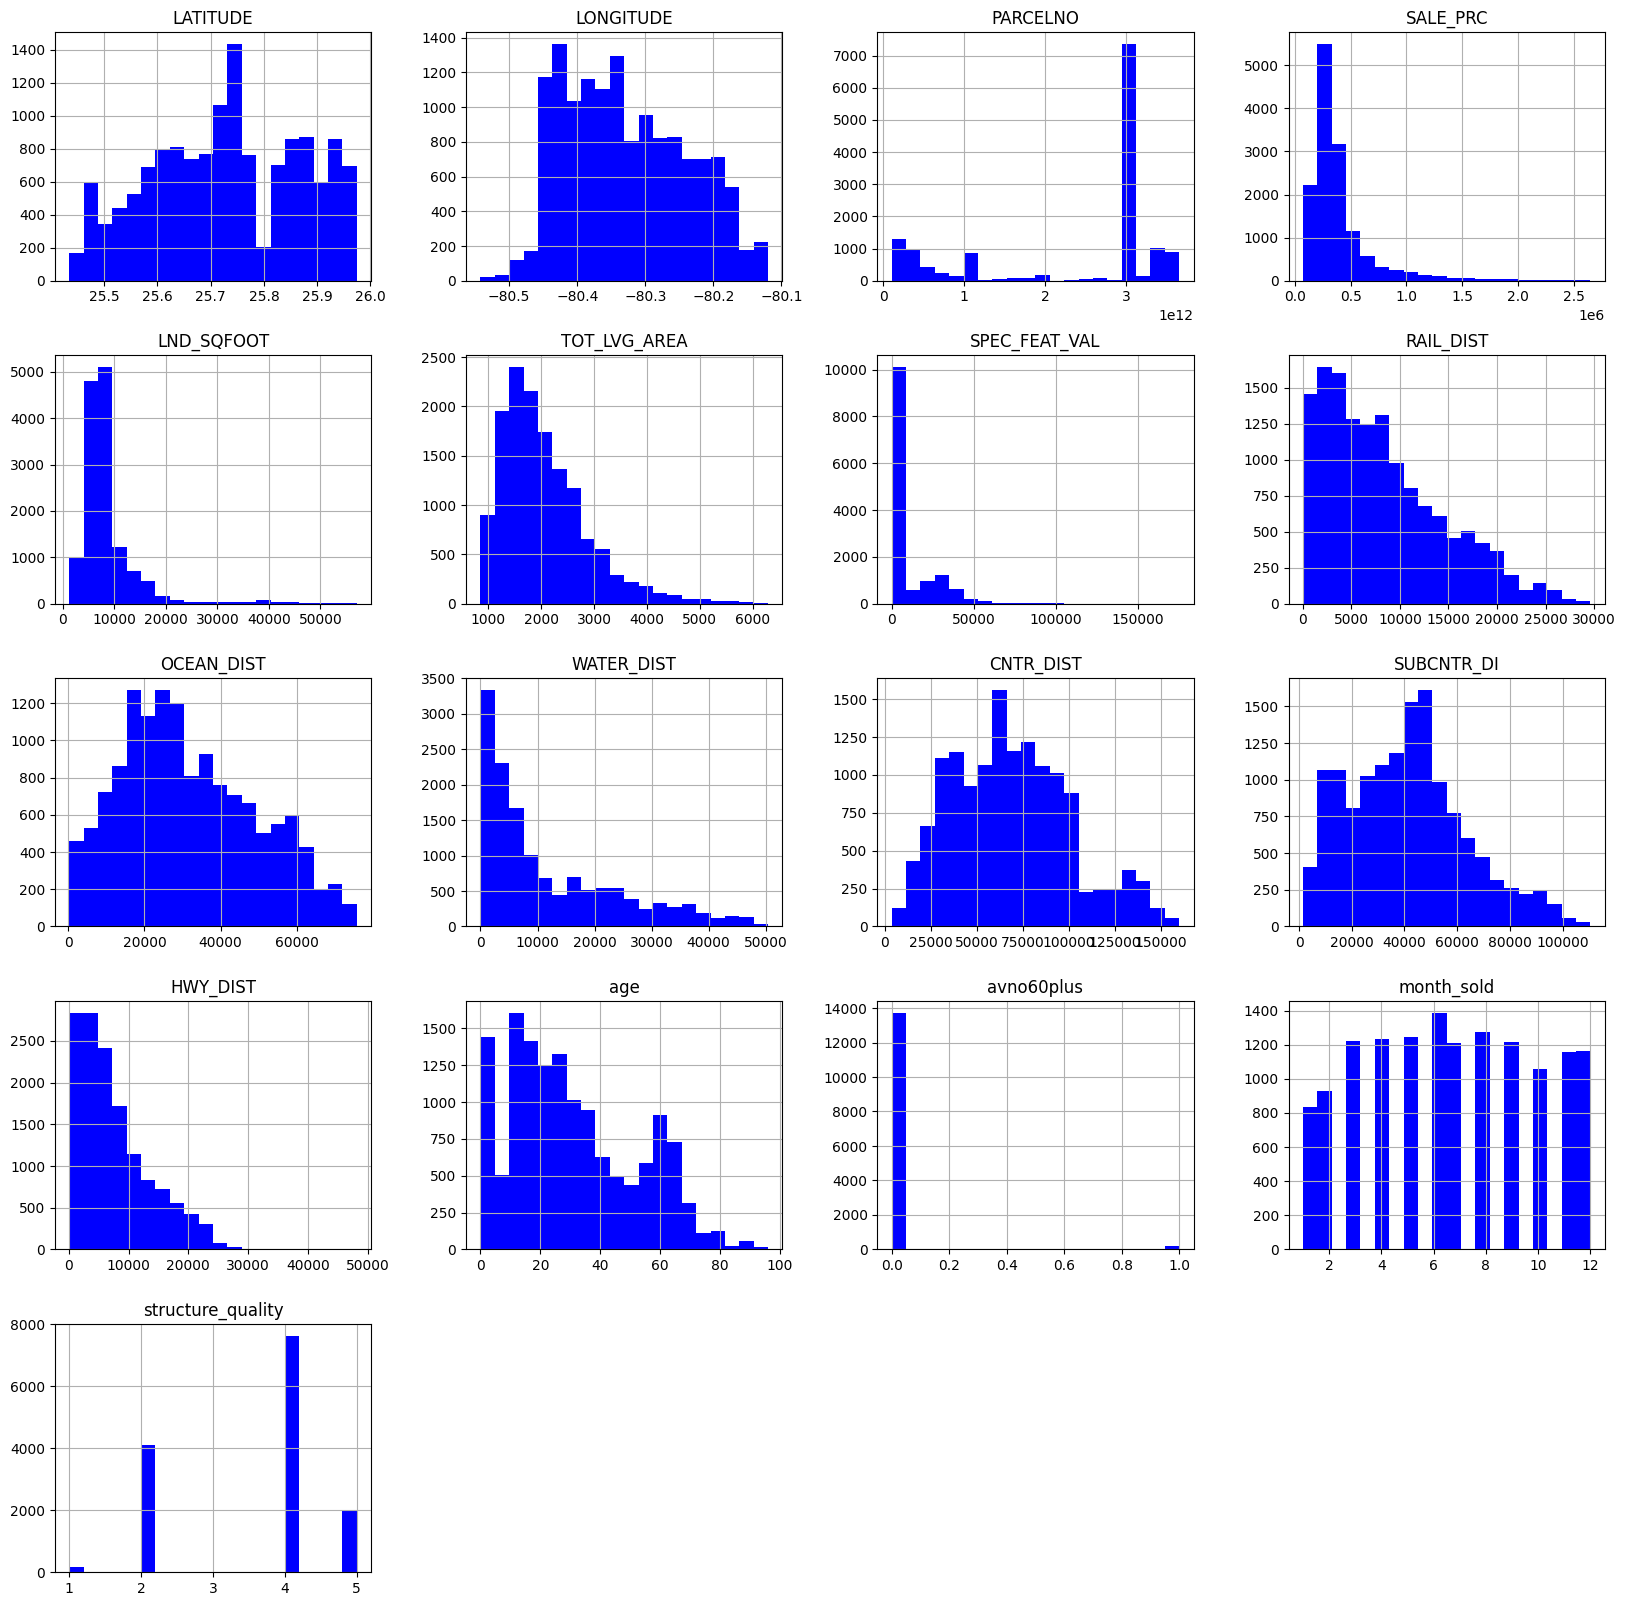

In [5]:
miami_housing_data.hist(bins= 20,figsize=(20,20),color= 'b');

#### 2. Feature selection:

In [6]:
X = miami_housing_data.drop(columns=['PARCELNO', 'SALE_PRC'])  # Features(X) - The feature PARCELNO does not have 
y = miami_housing_data['SALE_PRC']  # Target (y)


#### 3. Splitting Data into Features (X) and Target (y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) #(80% training, 20% testing)

### Train a Linear Regression model

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) # Model building

LinearRegression()

In [9]:
y_pred = lr_model.predict(X_test)

### Evaluation( Linear regression model):

In [10]:
mae = mean_absolute_error(y_test, y_pred)  #(Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred)  # (Mean Squared Error)
rmse = np.sqrt(mse)  # (Root Mean Squared Error)
r2 = r2_score(y_test, y_pred)  # (R-squared score)


In [11]:
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): $112400.85
Mean Squared Error (MSE): 31143983431.69
Root Mean Squared Error (RMSE): $176476.58
R-squared (R²): 0.68


### Plotting the graph (actual vs predictive)

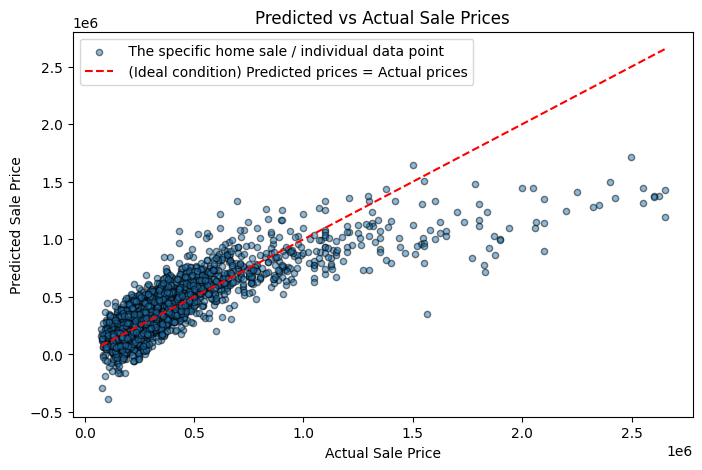

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, s=20, edgecolor='k',label=" The specific home sale / individual data point ")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--',label=" (Ideal condition) Predicted prices = Actual prices" )
plt.title('Predicted vs Actual Sale Prices') 
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.show()

The Red dashed line--> The ideal condition where predicted prices would exactly match actual prices(meaning it has zero errors).

The blue dots--> The specific home sale / individual data point.

#### Business Insights:

1.Additional features or a more complex model may improve predictive accuracy.

2.More accurate predictions benefit buyers and sellers.



### Recall, precision and accuracy ###


This not good we only can use rms rme stuff because it is a linear regression model

In [13]:
miami_housing_data.head(1)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,6.220000e+11,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4


In [14]:
data = pd.DataFrame({"LATITUDE":25.891031,"LONGITUDE":-80.160561,"LND_SQFOOT":9375,"TOT_LVG_AREA":1753,"SPEC_FEAT_VAL":0,\
                    "RAIL_DIST":2815.9,"OCEAN_DIST":12811.4,"WATER_DIST":347.6,\
                    "CNTR_DIST":42815.3,"SUBCNTR_DI":37742.2,"HWY_DIST":15954.9,\
                    "age":67,"avno60plus":0,"month_sold":8,"structure_quality":4}, index=[0])
new_prediction = lr_model.predict(data)
print(" the prediction value : $",new_prediction)

 the prediction value : $ [463597.44703734]


In [15]:
import joblib

In [16]:
joblib.dump(lr_model,"miami_housing_model")


['miami_housing_model']

In [17]:
model =joblib.load('miami_housing_model')

In [18]:
model.predict(data)

array([463597.44703734])